In [62]:
from pathlib import Path
import json
import pandas as pd

path = Path('../reports')

# get folders from path
folders = [x for x in path.iterdir() if x.is_dir()]

# in the folders are multiple json files. 
# Create a dataframe that contains in every row the data from the json files named "synthetic.json".

df = pd.DataFrame()
for folder in folders:
    files = [x for x in folder.iterdir() if x.is_file()]
    for file in files:
        with open(file) as json_file:
            data = json.load(json_file)
            data = {k: v for k, v in data.items() if k in ['supervised', 'unsupervised', 'data stats']}
            data = pd.json_normalize(data, meta=['supervised', 'unsupervised', 'data stats'])
            # add column for whether the folder name contains GCNSI or not
            data['GCNSI'] = 'GCNSI' in folder.name
            data['synthetic'] = 'synthetic' in file.name
            df = df.append(data, ignore_index=True)

In [63]:
# create a new average that contains the averages and standard deviations of the rows with the same model and synthetic data
# and for the rows with the same model and real data

df_avg = df.groupby(['GCNSI', 'synthetic']).agg(['mean', 'std'])
df_avg = df_avg.reset_index()
df_avg

GCNSI synthetic supervised.avg rank of source             \
                                            mean        std   
0  False     False                      101.8585  88.959455   
1  False      True                       31.6000   0.000000   
2   True     False                      101.3750  97.741090   
3   True      True                       24.5000   0.000000   

  supervised.avg prediction for source            \
                                  mean       std   
0                               1.2710  0.285911   
1                               1.2770  0.000000   
2                               0.5035  0.000548   
3                               0.5030  0.000000   

  supervised.avg prediction over all nodes            \
                                      mean       std   
0                                   1.1915  0.188964   
1                                   1.3760  0.000000   
2                                   0.5025  0.000548   
3                                   0.5020  0.000000   

  supervised.min prediction over all nodes            ...  \
                                      mean       std  ...   
0                                    0.455  0.240998  ...   
1                                    0.956  0.000000  ...   
2                                    0.482  0.004382  ...   
3                                    0.493  0.000000  ...   

  data stats.graph stats.avg number of nodes              \
                                        mean         std   
0                                      216.5  199.918733   
1                                       98.8    0.000000   
2                                      216.5  199.918733   
3                                       98.8    0.000000   

  data stats.graph stats.avg centrality            \
                                   mean       std   
0                                 0.107  0.035054   
1                                 0.103  0.000000   
2                                 0.107  0.035054   
3                                 0.103  0.000000   

  data stats.infection stats.avg number of sources            \
                                              mean       std   
0                                             1.75  0.273861   
1                                             2.00  0.000000   
2                                             1.75  0.273861   
3                                             2.00  0.000000   

  data stats.infection stats.avg portion of infected nodes            \
                                                      mean       std   
0                                             0.3905        0.185678   
1                                             0.1880        0.000000   
2                                             0.3905        0.185678   
3                                             0.1880        0.000000   

  data stats.infection stats.std portion of infected nodes           
                                                      mean      std  
0                                             0.2115        0.10352  
1                                             0.0920        0.00000  
2                                             0.2115        0.10352  
3                                             0.0920        0.00000  

[4 rows x 38 columns]

ValueError: 'yerr' (shape: (4,)) must be a scalar or a 1D or (2, n) array-like whose shape matches 'y' (shape: (2,))

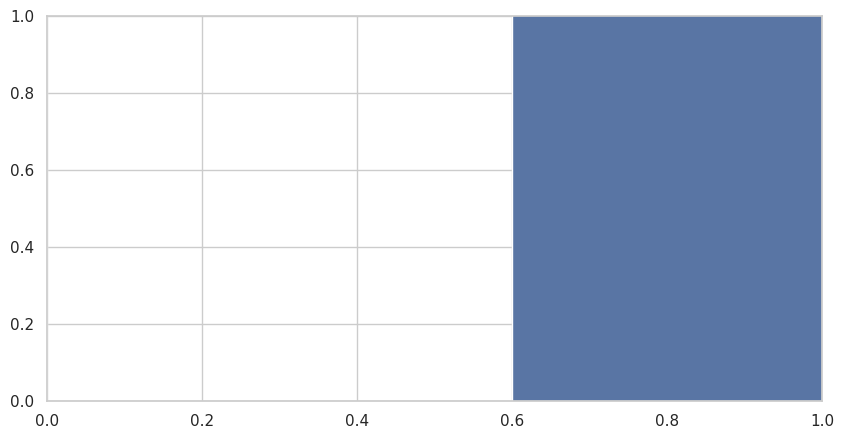

In [66]:

# from the dataframe, create a barplot for the column "supervised.avg rank of source" 
# plot always two bars next to each other, one for GCNSI = False and synthetic = False and one for GCNSI = False and synthetic = True
# and the same for GCNSI = True
# The bars should have wiskers for the standard deviation.
# The x-axis should be the model name and the y-axis should be the average rank of the source.

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 5))
y = df_avg['supervised.avg rank of source']['mean']
yerr = df_avg['supervised.avg rank of source']['std']
x = df_avg['GCNSI']
hue = df_avg['synthetic']
sns.barplot(x=x, y=y, hue=hue, yerr=yerr, ax=ax)
ax.set_title('Average rank of source')
ax.set_ylabel('Average rank of source')
ax.set_xlabel('GCNSI')
plt.show()


